# CNN model for Image Classification

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

## Download the Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


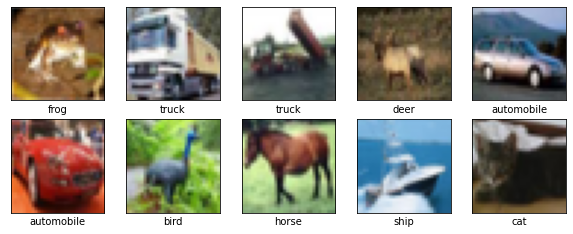

In [3]:
# Define the 10 image classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show the first 10 images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Die CIFAR Labels sind Arrays, deshalb benötigen wir den extra Index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Build a Convolutional Neural Network

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [5]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Compile and Train the Model

In [6]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.5450 - accuracy: 0.4369 - val_loss: 1.3003 - val_accuracy: 0.5301
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.2001 - accuracy: 0.5752 - val_loss: 1.1285 - val_accuracy: 0.6002
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0560 - accuracy: 0.6263 - val_loss: 0.9947 - val_accuracy: 0.6513
Epoch 4/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9594 - accuracy: 0.6635 - val_loss: 0.9830 - val_accuracy: 0.6586
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8910 - accuracy: 0.6876 - val_loss: 0.9919 - val_accuracy: 0.6591
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8336 - accuracy: 0.7103 - val_loss: 0.9587 - val_accuracy: 0.6693
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7812 - accuracy: 0.7244 - val_loss: 0.9344 -

## Evaluate the Model

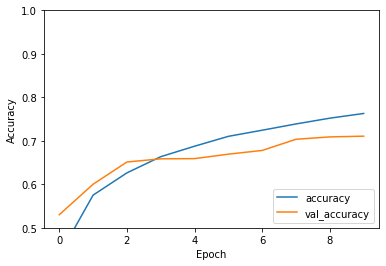

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')